In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Placement_Data_Full_Class.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
dataset.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [5]:
dataset.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [6]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
dataset['salary']=dataset['salary'].fillna(0)

In [8]:
dataset.isna().sum() #The nan values are only for  not placed std .So i condiserd zero for salary not placed std 

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [9]:
#2)How many of them are not placed?
dataset["status"].value_counts()#Total 67 person not placed 

Placed        148
Not Placed     67
Name: status, dtype: int64

In [10]:
#3)Find the reason for non placement from the dataset?
Non_Placement=dataset.groupby(["status","hsc_s","workex"])
Non_Placement.get_group(("Not Placed","Commerce","No"))

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,0.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,0.0
14,15,M,62.00,Central,47.00,Central,Commerce,50.00,Comm&Mgmt,No,76.00,Mkt&HR,54.96,Not Placed,0.0
17,18,F,55.00,Central,67.00,Central,Commerce,64.00,Comm&Mgmt,No,60.00,Mkt&Fin,67.28,Not Placed,0.0
18,19,F,63.00,Central,66.00,Central,Commerce,64.00,Comm&Mgmt,No,68.00,Mkt&HR,64.08,Not Placed,0.0
29,30,M,62.00,Central,67.00,Central,Commerce,58.00,Comm&Mgmt,No,77.00,Mkt&Fin,51.29,Not Placed,0.0
36,37,M,51.00,Central,44.00,Central,Commerce,57.00,Comm&Mgmt,No,64.00,Mkt&Fin,51.45,Not Placed,0.0
51,52,M,54.40,Central,61.12,Central,Commerce,56.20,Comm&Mgmt,No,67.00,Mkt&HR,62.65,Not Placed,0.0
52,53,F,40.89,Others,45.83,Others,Commerce,53.00,Comm&Mgmt,No,71.20,Mkt&HR,65.49,Not Placed,0.0
63,64,M,61.00,Others,70.00,Others,Commerce,64.00,Comm&Mgmt,No,68.50,Mkt&HR,59.50,Not Placed,0.0


In [11]:
Non_Placement.count()

sl_no  gender  ssc_p  ssc_b  hsc_p  hsc_b  \
status     hsc_s    workex                                              
Not Placed Arts     No          3       3      3      3      3      3   
                    Yes         2       2      2      2      2      2   
           Commerce No         29      29     29     29     29     29   
                    Yes         5       5      5      5      5      5   
           Science  No         25      25     25     25     25     25   
                    Yes         3       3      3      3      3      3   
Placed     Arts     No          3       3      3      3      3      3   
                    Yes         3       3      3      3      3      3   
           Commerce No         48      48     48     48     48     48   
                    Yes        31      31     31     31     31     31   
           Science  No         33      33     33     33     33     33   
                    Yes        30      30     30     30     30     30   

                            degree_p  degree_t  etest_p  specialisation  \
status     hsc_s    workex                                                
Not Placed Arts     No             3         3        3               3   
                    Yes            2         2        2               2   
           Commerce No            29        29       29              29   
                    Yes            5         5        5               5   
           Science  No            25        25       25              25   
                    Yes            3         3        3               3   
Placed     Arts     No             3         3        3               3   
                    Yes            3         3        3               3   
           Commerce No            48        48       48              48   
                    Yes           31        31       31              31   
           Science  No            33        33       33              33   
                    Yes           30        30       30              30   

                            mba_p  salary  
status     hsc_s    workex                 
Not Placed Arts     No          3       3  
                    Yes         2       2  
           Commerce No         29      29  
                    Yes         5       5  
           Science  No         25      25  
                    Yes         3       3  
Placed     Arts     No          3       3  
                    Yes         3       3  
           Commerce No         48      48  
                    Yes        31      31  
           Science  No         33      33  
                    Yes        30      30

In [12]:
Non_Placement.get_group(("Not Placed","Commerce","No")).count()
#Total  person not placed =67
#Total person not placed in Commerce =29

sl_no             29
gender            29
ssc_p             29
ssc_b             29
hsc_p             29
hsc_b             29
hsc_s             29
degree_p          29
degree_t          29
workex            29
etest_p           29
specialisation    29
mba_p             29
status            29
salary            29
dtype: int64

In [13]:
#4)What kind of relation between salary and mba_pdataset["mba_p"].corr(dataset["salary"])
dataset["mba_p"].corr(dataset["salary"])

0.13982273892615557

<function matplotlib.pyplot.show(close=None, block=None)>

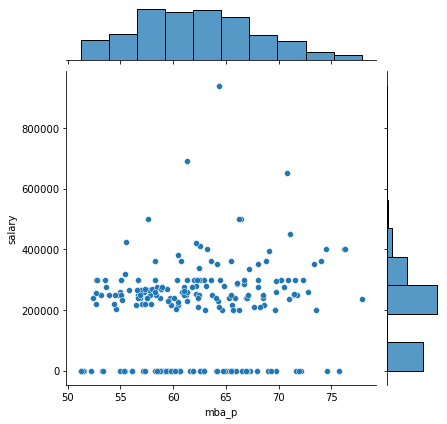

In [14]:
sb.jointplot(x="mba_p",y="salary",data=dataset)
plt.show
#Those who are got pass mark in mba ( 55 to 70 )now they are getting salary 2 lakhs to 4lakhs

In [15]:
#5)Which specialization is getting minimum salary?
dataset[dataset["salary"]==dataset["salary"].min()]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,0.0
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,0.0
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,0.0
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,0.0
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,0.0
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,0.0
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,0.0
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,0.0


In [16]:
pd.pivot_table(dataset,values="salary",index=["specialisation"])
#minimum salary getting  specialization

,salary
specialisation,
Mkt&Fin,236591.666667
Mkt&HR,150842.105263


In [17]:
#6)How many of them getting above 500000 salary?
len(dataset[dataset["salary"]>=500000])
#only 6person getting 500000 salary 

6

In [18]:
#7)Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)
import scipy.stats as stats
stats.f_oneway(dataset['etest_p'],dataset['mba_p'])
#p-value<0.05-->reject null hypothesis
#There is no differance between etest_p and mba_p --->accept null hypothesis
#There is no differance between etest_p and mba_p---->reject alternate hypothesis

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

In [19]:
#8)Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make decision using Hypothesis Testing)
from scipy.stats import ttest_ind
dataset=dataset.dropna()
degree = dataset[dataset['degree_t']=='Sci&Tech']['salary']
specialization = dataset[dataset['specialisation']=='Mkt&HR']['salary']

ttest_ind(degree,specialization)

Ttest_indResult(statistic=2.692041243555374, pvalue=0.007897969943471179)

In [20]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
degree = dataset[dataset['degree_t']=='Sci&Tech']['salary']
specialization = dataset[dataset['specialisation']=='Mkt&HR']['salary']
ttest_ind(degree,specialization)

Ttest_indResult(statistic=2.692041243555374, pvalue=0.007897969943471179)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

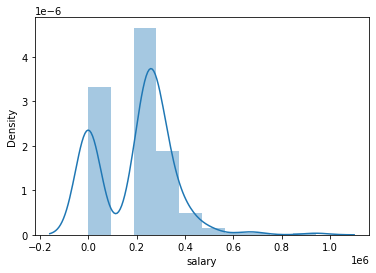

In [21]:
#9)Convert the normal distribution to standard normal distribution for salary column
import seaborn as sns
sns.distplot(dataset['salary'],kde=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-8.881784197001253e-17

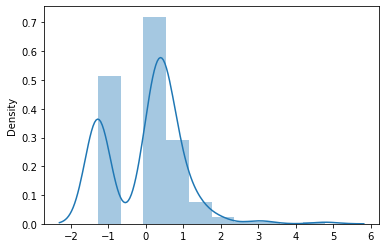

In [22]:
mean=dataset['salary'].mean()
std=dataset['salary'].std()
values=[i for i in dataset['salary']]
z_score=[((j-mean)/std) for j in values]
sns.distplot(z_score,kde=True)
sum(z_score)/len(z_score)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


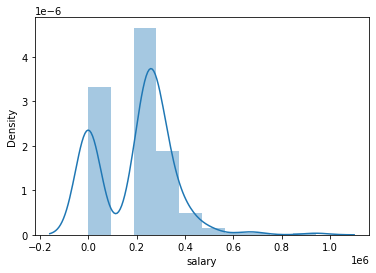

In [33]:
#10) What is the probability Density Function of the salary range from 700000 to 900000
import seaborn as sns
x=dataset['salary']
ax = sns.distplot(dataset['salary'],kde=True)

In [23]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean=198702.326, Standard Deviation=154780.927
The area between range(700000,900000):0.0005973310593974901


0.0005973310593974901

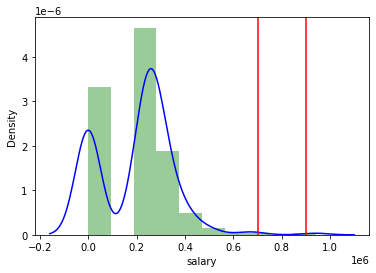

In [24]:
get_pdf_probability(dataset['salary'],700000,900000)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean=198702.326, Standard Deviation=154780.927
The area between range(200000,400000):0.399946857103383


0.399946857103383

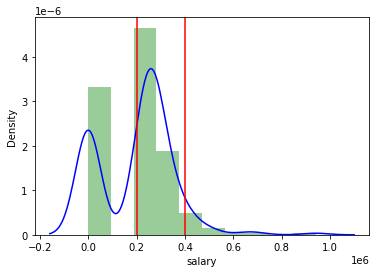

In [25]:
get_pdf_probability(dataset['salary'],200000,400000)

In [26]:
#11)Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)
from scipy.stats import ttest_ind
dataset=dataset.dropna()
degree = dataset[dataset['degree_t']=='Sci&Tech']['salary']
specialisation = dataset[dataset['specialisation']=='Mkt&HR']['salary']
#print(degree)
ttest_ind(degree,specialisation)

Ttest_indResult(statistic=2.692041243555374, pvalue=0.007897969943471179)

In [27]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
degree = dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
degree1 = dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
ttest_rel(degree,degree1)

Ttest_relResult(statistic=5.0049844583693615, pvalue=5.517920600505392e-06)

In [28]:
#12)Which parameter is highly correlated with salary
correlation=pd.DataFrame(index=["ssc_p","hsc_p","degree_p","etest_p","mba_p"],columns=["salary"])
# Ssc_p is the highly correlated with salary because that value is 0.53

In [29]:
for i in correlation.index:
    correlation["salary"][i]=dataset[i].corr(dataset["salary"])
    print(correlation["salary"][i])

0.5380897133485512
0.4525687760619277
0.4083707811765698
0.18698768538632038
0.13982273892615557


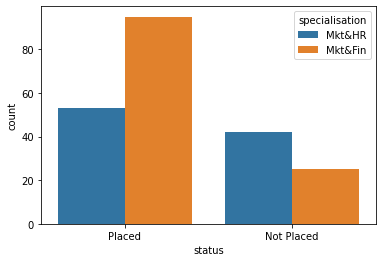

In [30]:
#13) plot any useful graph and explain it
sns.countplot(x ="status",hue="specialisation",data=dataset)# Msost of the people are placed in Mkt&Fin group
plt.show()

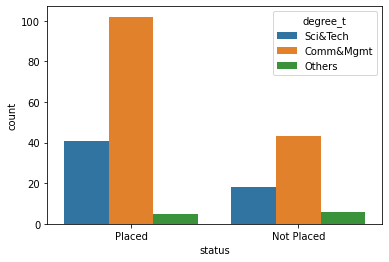

In [31]:
sns.countplot(x ="status",hue="degree_t",data=dataset) #Mpost of the people are placed Comm&Mgmt
plt.show()  

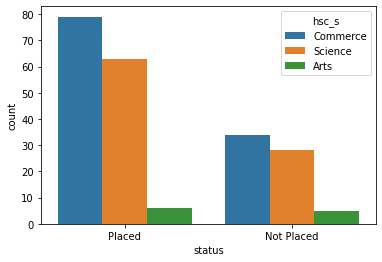

In [32]:
sns.countplot(x ="status",hue="hsc_s",data=dataset) #Most of the people are placed Commerce
plt.show()       